In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
df = pd.read_csv("../data/raw/heart_cleveland_upload.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


### Видим что датасет небольшой (297 наблюдений). Пропусков в данных нет. Число фичей тоже небольшое - 13.

In [85]:
df_describe = df.describe()
df_describe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


### Стоит отметить, что данные охватывают в основном людей в возрасте: 75% наблюдаемых старше 48 лет. Что касается пола, то он смещен в сторону мужчин. Можно также заметить, что таргет распределен достаточно сбалансированно, примерно половина людей на самом деле больны.

In [86]:
df.duplicated().sum()

0

### Дублирующихся наблюдений в нашем датасете нет

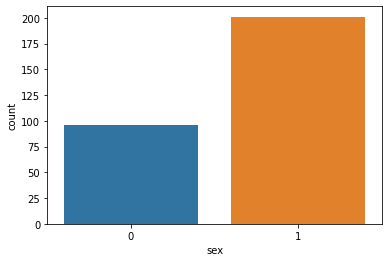

In [87]:
sns.countplot(x = df['sex'])
plt.savefig('../reports/pictures/count_plot_sex.png')

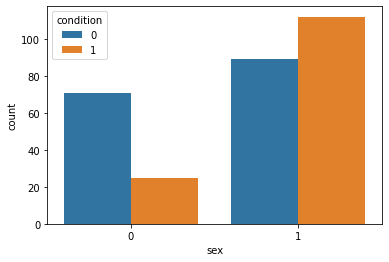

In [88]:
sns.countplot(data=df, x="sex", hue="condition")
plt.savefig('../reports/pictures/count_plot_sex_cond.png')

### Среди женщин заболевание встречается реже чем среди мужчин

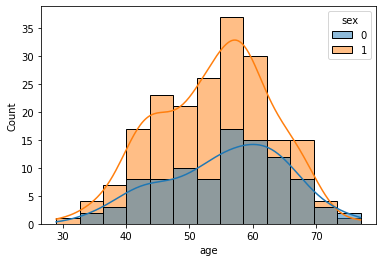

In [89]:
sns.histplot(data=df, x="age", hue = 'sex', kde=True)
plt.savefig('../reports/pictures/man_woman_comp.png')

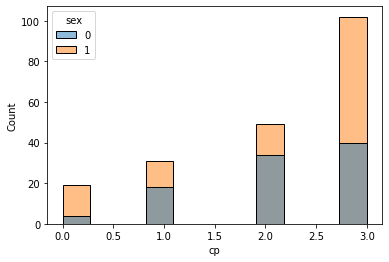

In [90]:
sns.histplot(data=df, x="cp", hue = 'sex')
plt.savefig('../reports/pictures/cp_comp.png')

In [91]:
df_feat = df.drop(columns = ['condition'])

### Посмотрим на гистограммы по всем числовым фичам

In [92]:
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_numeric_features = df_feat[numeric_features]

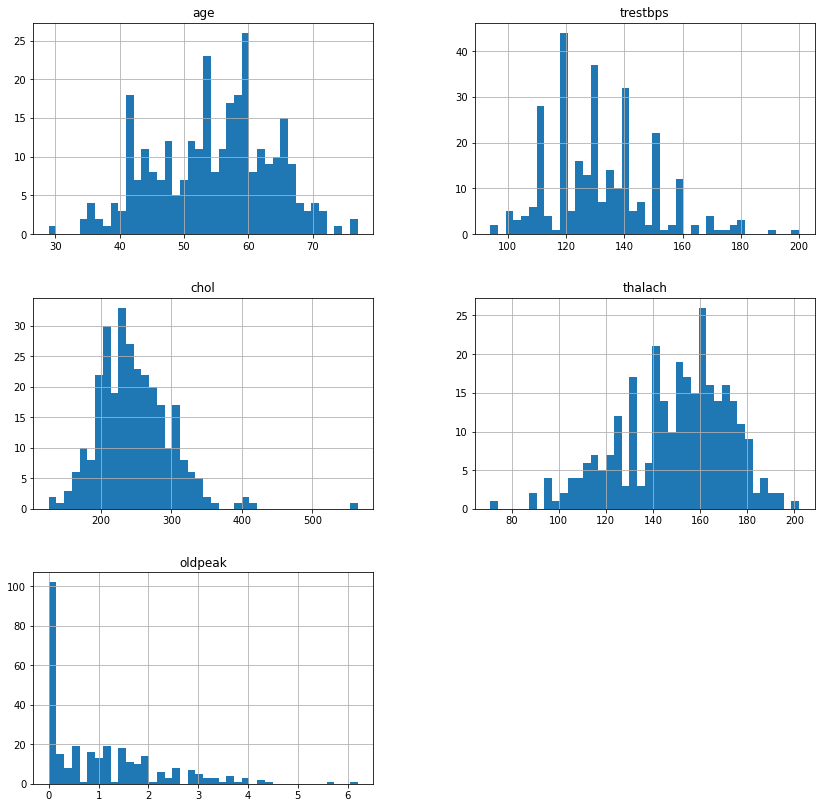

In [93]:
df_numeric_features.hist(figsize=(14, 14), bins=40, xlabelsize=10, ylabelsize=10)
plt.savefig('../reports/pictures/hists.png')

In [94]:
df_feat.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.120795
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.370556
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.266275
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.130612
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.023441
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.051038
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.013612
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.258386
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.323268
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.336809


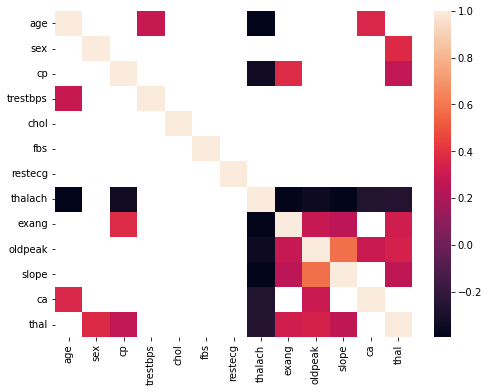

In [95]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_feat.corr()[(df_feat.corr() >= 0.25) | (df_feat.corr() <= -0.25)])
plt.savefig('../reports/pictures/corr.png')

### Наиболее сильная корреляция наблюдается у переменных slope и oldpeak

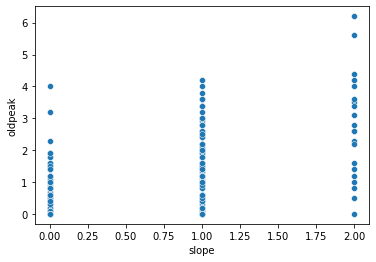

In [96]:
sns.scatterplot(data=df, x="slope", y="oldpeak")
plt.savefig('../reports/pictures/high_corr.png')

### Посмотрим какие переменные наиболее скореллированы с таргетом

In [97]:
df_target_corr = df.corr()['condition'][:-1] # -1 because the latest row is SalePrice
most_corr_features = df_target_corr[abs(df_target_corr) > 0.3].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(most_corr_features), most_corr_features))

There is 7 strongly correlated values with SalePrice:
thal       0.520516
ca         0.463189
oldpeak    0.424052
exang      0.421355
cp         0.408945
slope      0.333049
thalach   -0.423817
Name: condition, dtype: float64


In [98]:
df_feat.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [99]:
df_categorical_features = df_feat.drop(columns = numeric_features)

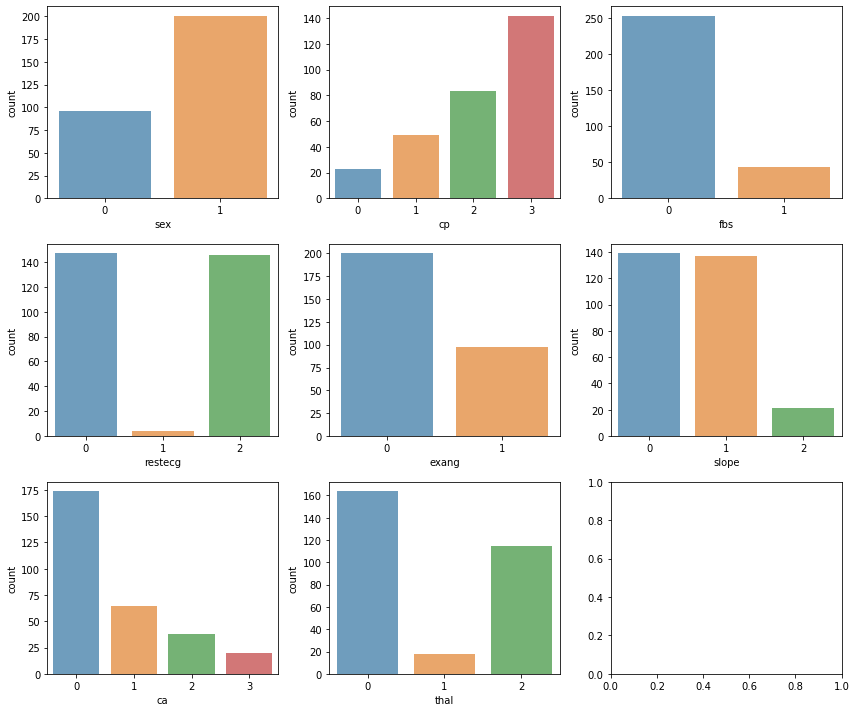

In [100]:
fig, axes = plt.subplots(round(len(df_categorical_features.columns) / 3), 3, figsize=(12, 10))

for i, ax in enumerate(fig.axes):
    if i < len(df_categorical_features.columns):
        sns.countplot(x=df_categorical_features.columns[i], alpha=0.7, data=df_categorical_features, ax=ax)

fig.tight_layout()
plt.savefig('../reports/pictures/hist_cat_feat.png')

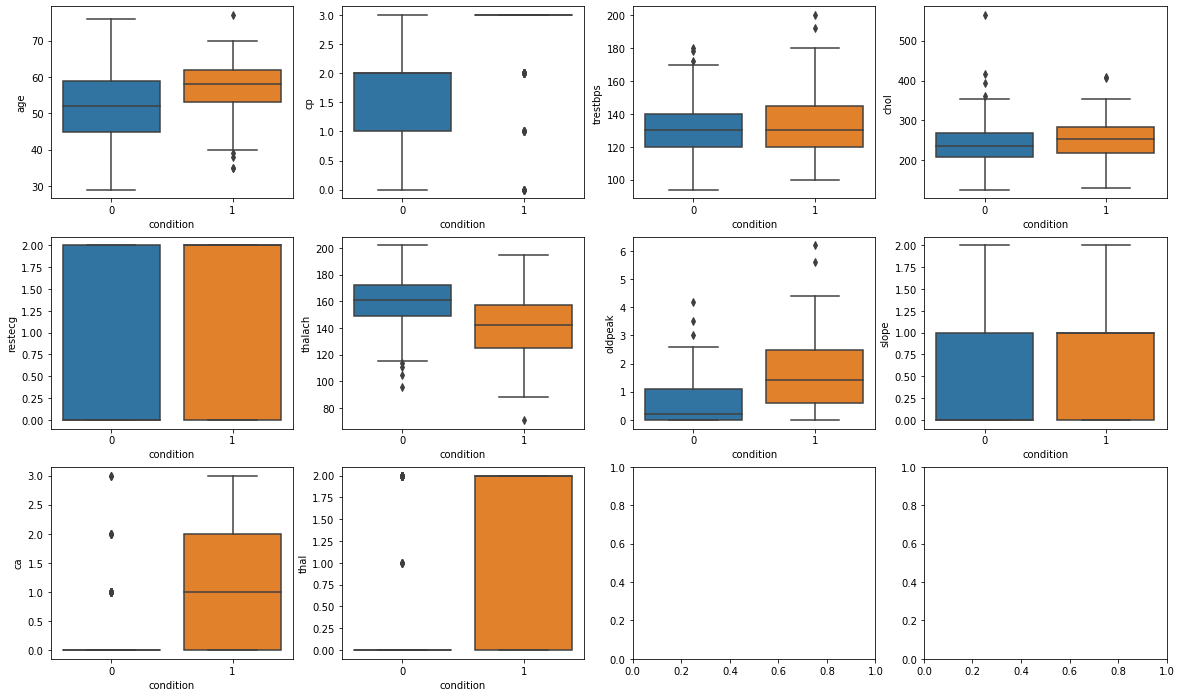

In [101]:
dims = (3, 4)
 
f, axes = plt.subplots(dims[0], dims[1], figsize=(20, 12))
axis_i, axis_j = 0, 0
for col in df_feat.columns:
    if col in ['sex', 'fbs','exang']:
        continue
    sns.boxplot(x=df['condition'], y=df_feat[col], ax=axes[axis_i, axis_j])
    axis_j += 1
    if axis_j == dims[1]:
        axis_i += 1
        axis_j = 0
plt.savefig('../reports/pictures/boxplot.png')